<div class="frontmatter text-center">
<h1> Introduction to Data Science and Programming</h1>
<h2>Exercise 19: Introduction to network science</h2>
<h3>IT University of Copenhagen, Fall 2020</h3>
Notebook adapted from: A network science class by Sean Cornelius and Emma Thompson
</div>
<hr>

## Importing required modules

In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline

## Basic data types in NetworkX
NetworkX provides the following classes that represent network-related data,
as well as network analysis algorithms that operate on these objects:

**Graph**       - Undirected graph with self loops


**DiGraph**      - Directed graph with self loops

**MultiGraph**   - Undirected Graph with self loops and multiple edges between the same node pair


**MultiDiGraph** - Directed Graph with self loops and multiple edges between the same node pair

## Getting started
Create an empty undirected graph and call it G

In [2]:
G = nx.Graph()

## Nodes
A node mode can be pretty much anything, including numbers, strings, GPS coordinates, even another graph.
Nodes can be added one at a time using `G.add_node(n)` (the `G` being the graph and `n` being the node to add).

- Add 7 nodes one at a time to G. Make sure there are no more than two of a type.
- Print the added nodes using `G.nodes`

In [9]:
G.add_node(6) # we add a node
n = 10 # we make a variable
G.add_node(n) # we add the variable as a node

# add your own original nodes
G.add_node("420")
G.add_node("420")
G.add_node("Copenhagen")
G.add_node("Aalborg")
G.add_node("Aarhus")
G.add_node("Bucharest")
G.add_node("Madrid")
G.add_node("Fengmao")

In [13]:
G.add_node(34.2)

In [10]:
G.nodes

NodeView((6, 10, '420', 'Copenhagen', 'Aalborg', 'Aarhus', 'Bucharest', 'Madrid', 'Fengmao'))

We can also add many nodes at a time using `G.add_nodes_from(lst)` as below. We've added one list for you.
- Make your own list of nodes and add them too:

In [14]:
G.add_nodes_from([1, 2, 3]) # our list
G.add_nodes_from(["Alice", "Bob", "Christian"]) # your list goes here

In [19]:
G.remove_node(True)

In [21]:
G.add_node(1)

In [22]:
G.nodes

NodeView((6, 10, '420', 'Copenhagen', 'Aalborg', 'Aarhus', 'Bucharest', 'Madrid', 'Fengmao', 34.2, 2, 3, 'Alice', 'Bob', 'Christian', 'Noah', 1))

In [30]:
list(G.nodes)[0]

6

## Node attributes
Nodes can have arbitrary attributes associated with them, contained in a string-index dictionary.
You can add attributes at the time of node creation using keyword arguments as follows:

In [16]:
G.add_node("Noah", eye_color='brown', height=193)

You can also add attributes to an already existing node:

In [23]:
G.add_node("Natalie")
# add an attribute "books" with value 500 to Natalie
G.nodes["Natalie"]["books"] = 500

- Make two new nodes with attributes
- Add 2 attributes to at least 4 of your pre-existing nodes

In [24]:
# your code here
G.add_node("Lilac", color="purple")
G.add_node("Rose", color="red")

G.nodes["Fengmao"]["eye_color"] = "brown"
G.nodes["Fengmao"]["hair_color"] = "brown"

In [26]:
G.nodes["Fengmao"]

{'eye_color': 'brown', 'hair_color': 'brown'}

In [27]:
G.nodes["Copenhagen"]

{}

`G.nodes[n]` gives a dictionary containing all the `attribute: value` pairs associated with node n:

In [31]:
print("Noah's eyes are ", G.nodes["Noah"]["eye_color"], " and he is ", G.nodes['Noah']['height'], " cm tall.")
print("Natalie has ", G.nodes["Natalie"]["books"], " books.")

Noah's eyes are  brown  and he is  193  cm tall.
Natalie has  500  books.


- Make a sentence (as we did above) using nodes attributes. If you're cooler than us use `.format()` or `f""`

In [34]:
list(G.nodes)[0]

6

In [32]:
# your code here
print(f"Fengmao has {G.nodes['Fengmao']['eye_color']} eyes and {G.nodes['Fengmao']['hair_color']} hair")

Fengmao has brown eyes and brown hair


## Edges

An edge between node `node1` and node `node2` is represented by the tuple (`node1`, `node2`).

In [35]:
# add edge between node 0 and node 1
G.add_edge(0, 1) # They can be added one at a time:
G.add_edges_from([ (2, 1), ("Michael", "Natalie"), (3, 4) ]) # or from a list


- Add 4 edges however you want, between whatever nodes you want.
- Print a list of nodes `print(list(G.nodes))`
- Print a list of edges

In [39]:
# your code here
G.add_edge("Copenhagen","Fengmao")
list(G.edges)

[('Copenhagen', 'Fengmao'), (2, 1), (3, 4), (1, 0), ('Natalie', 'Michael')]

**Note:** When adding an edge, nodes will be automatically created if they don't already exist.

## Edge attributes

Like nodes, edges can also have attributes. An important and special attribute (for many algorithms) is "edge weight"

The syntax for adding/accessing edge attributes is the similar to that for nodes:

In [40]:
G.add_edge("Michael", "Natalie", weight=10)
G["Michael"]["Natalie"]

{'weight': 10}

- Add attributes to three of your edges

In [45]:
# your code
G.add_edge("Copenhagen", "Madrid", distance=2000)
G["Copenhagen"]["Madrid"]

{'type': 'capitol', 'distance': 2000}

`G[node1][node2]` is a dictionary containing all attribute:value pairs associated with the edge from node1 to node2.

You can also get edge attributes using `G.get_edge_data("node1", "node2")` and **set** attributes using
`G.set_edge_attributes(G, attributes)` like so:

In [46]:
G.add_edge("Copenhagen", "Aarhus")
attrs = {("Copenhagen", "Aarhus"): {'distance': 186.7}} # key is edge, value is attribute
nx.set_edge_attributes(G, attrs)

print(list(G.edges))
print(G["Copenhagen"]["Aarhus"]['distance'])
print(G.get_edge_data("Copenhagen", "Aarhus"))

[('Copenhagen', 'Fengmao'), ('Copenhagen', 'Madrid'), ('Copenhagen', 'Aarhus'), (2, 1), (3, 4), (1, 0), ('Natalie', 'Michael')]
186.7
{'distance': 186.7}


## Size of the network

- use `G.number_of_nodes()` or `len(G)` to determine node count of the network.
- use `G.number_of_edges()` or `G.size()` to determine node count of the network.
- print a sentence of stating the number of nodes and the number of edges (use .format())

In [51]:
# your code
print(f"Our network has {len(G)} nodes and {G.size()} edges.")

Our network has 23 nodes and 7 edges.


## Testing to see whether nodes or edges exist
- Use `G.has_node(n)` to see if `"michael"` is a node in `G`:
- Do the same by using `"michael" in G`

In [54]:
# your code
G.has_node("michael"), "Michael" in G


(False, True)

For edges, you must use `has_edge()` (no syntax like `edge in G`)
- Check for the existence of an edge in the network, and an edge **not** in the network.

In [55]:
# your code
G.has_edge("Michael", "Natalie")

True

## Finding neighbors of a node

In [56]:
list(G.neighbors(1))

[0, 2]

* In `DiGraph` objects, `G.neighbors(node)` gives the successors of `node`, as does `G.successors(node)`  
* Predecessors of `node` can be obtained with `G.predecessors(node)`

## Iterating over nodes and edges
Nodes and edges can be iterated over with `G.nodes()` and `G.edges()` respectively  

In [57]:
for node, data in list(G.nodes(data=True)): # data=True includes node attributes as dictionaries
    print("Node {0}\t\t\t: {1}".format(node, data))

Node 6			: {}
Node 10			: {}
Node 420			: {}
Node Copenhagen			: {}
Node Aalborg			: {}
Node Aarhus			: {}
Node Bucharest			: {}
Node Madrid			: {}
Node Fengmao			: {'eye_color': 'brown', 'hair_color': 'brown'}
Node 34.2			: {}
Node 2			: {}
Node 3			: {}
Node Alice			: {}
Node Bob			: {}
Node Christian			: {}
Node Noah			: {'eye_color': 'brown', 'height': 193}
Node 1			: {}
Node Natalie			: {'books': 500}
Node Lilac			: {'color': 'purple'}
Node Rose			: {'color': 'red'}
Node 0			: {}
Node Michael			: {}
Node 4			: {}


In [58]:
for n1, n2, data in list(G.edges(data=True)):
    print("{0} <----> {1}: {2}".format(n1, n2, data))

Copenhagen <----> Fengmao: {}
Copenhagen <----> Madrid: {'type': 'capitol', 'distance': 2000}
Copenhagen <----> Aarhus: {'distance': 186.7}
2 <----> 1: {}
3 <----> 4: {}
1 <----> 0: {}
Natalie <----> Michael: {'weight': 10}


- Use a for loop like the one above to only print nodes that are strings
- Use a for loop to only print edges whose nodes are integers

In [59]:
# your code
for node in G.nodes():
    if type(node) == str:
        print(node)

420
Copenhagen
Aalborg
Aarhus
Bucharest
Madrid
Fengmao
Alice
Bob
Christian
Noah
Natalie
Lilac
Rose
Michael


## Calculating degrees

- Get the degree of a node you like using `G.degree(node)`
- Get a dictionary of the from node:degree using `G.degree()` for yor network
- Make a list of only degrees (without the corresponding nodes)

In [65]:
# your code
list(dict(G.degree()).values())

[0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1]

As you know, in directed graphs (of class `DiGraph`) there are two types of degree. Things work just as you expect
* `G.in_degree(node) `
* `G.out_degree(node) `


### Other operations with `x`

* ***`subgraph(G, nodes)` or `G.subgraph(nodes)`***
subgraph of `G induced by nodes in `nodes`

* ***`reverse(G)`***       
DiGraph with all edges reversed

* ***`union(G1, G2)`***      
graph union    

* ***`disjoint_union(G1, G2)`***     
same, but treats nodes of G1, G2 as different 

* ***`intersection(G1, G2)`***      
graph with only the edges in common between G1, G2

* ***`difference(G1, G2)`***      
graph with only the edges G1 that aren't in G2

* ***`copy(G)` or `G.copy()`***     
copy of G

* ***`complement(G)` or `G.complement()`***     
the complement graph of G 

* ***`convert_to_undirected(G)` or `G.to_undirected()`***     
undirected version of G (a Graph or MultiGraph)  

* ***`convert_to_directed(G)` or `G.to_directed()`***      
directed version of G (a DiGraph of MultiDiGraph)

* ***`adjacency_matrix(G)`***      
adjacency matrix A of G (in sparse matrix format; to get full matrix, use A.toarray() )

# Graph I/O

Usually you will not be building a network from scratch one node/link at a time. Instead, you will
want to read it in from an appropriate data file. NetworkX can understand the following common graph
formats:

* edge lists
* adjacency lists
* GML
* GEXF
* Python 'pickle'
* GraphML
* Pajek
* LEDA
* YAML

# Reading in an edge list

Read in the file `test.txt` with the following options
* lines starting with `#` are treated as comments and ignored  
* use a `Graph` object to hold the data (i.e., network is undirected)  
* data are separated by whitespace (' ')
* nodes should be treated as integers (`int`)
* encoding of the text file containing the edge list is utf-8

In [75]:
# read in an edge list from the file 'test.txt'
G = nx.read_edgelist('test.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### Allowed formats
* Node pairs with no data  
`1 2`
* Node pairs with python dictionary  
`1 2 {weight:7, color:"green"}`

# Basic analysis example
A large number of basic analyses can be done in one line using NetworkX + numpy or builtin python functions like `min`, `max`, etc.

In [69]:
N = len(G)
L = G.size()
degrees = [d for _, d in G.degree()]
kmin = min(degrees)
kmax = max(degrees)

In [70]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  443
Number of edges:  540

Average degree:  2.4379232505643342
Average degree (alternate calculation) 2.4379232505643342

Minimum degree:  1
Maximum degree:  8


# The gnutella network

- Read in the provided Gnutella network and perform a basic network analysis like the one above.

In [73]:
# your network analysis code here
G = nx.read_edgelist('p2p-Gnutella08.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter='\t', 
                     nodetype=int, 
                     encoding='utf-8')

N = len(G)
L = G.size()
degrees = [d for _, d in G.degree()]
kmin = min(degrees)
kmax = max(degrees)

print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  6301
Number of edges:  20777

Average degree:  6.594826218060625
Average degree (alternate calculation) 6.594826218060625

Minimum degree:  1
Maximum degree:  97


# Drawing the network
* NetworkX can draw networks using a large number of layout algorithms
* The results are not as pretty as Gephi, but NetworkX is better for a quick 'n dirty visualization and
gives you finer-grained control over the layout.

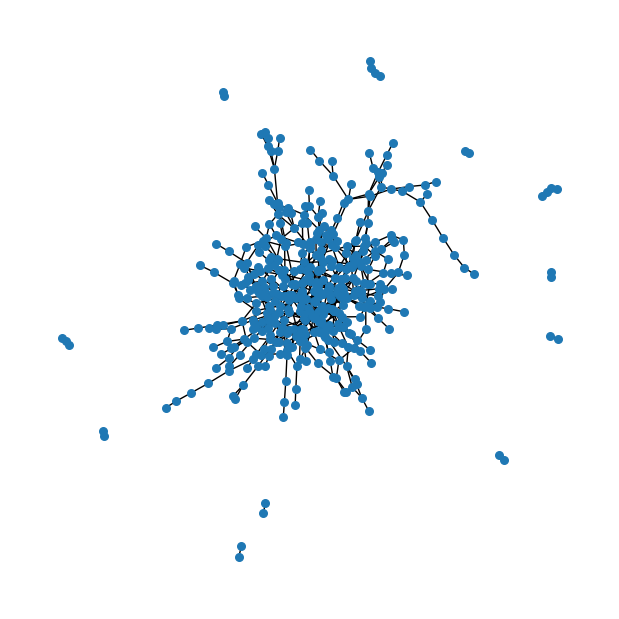

In [77]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(6,6))
nx.draw_spring(G, node_size=30)

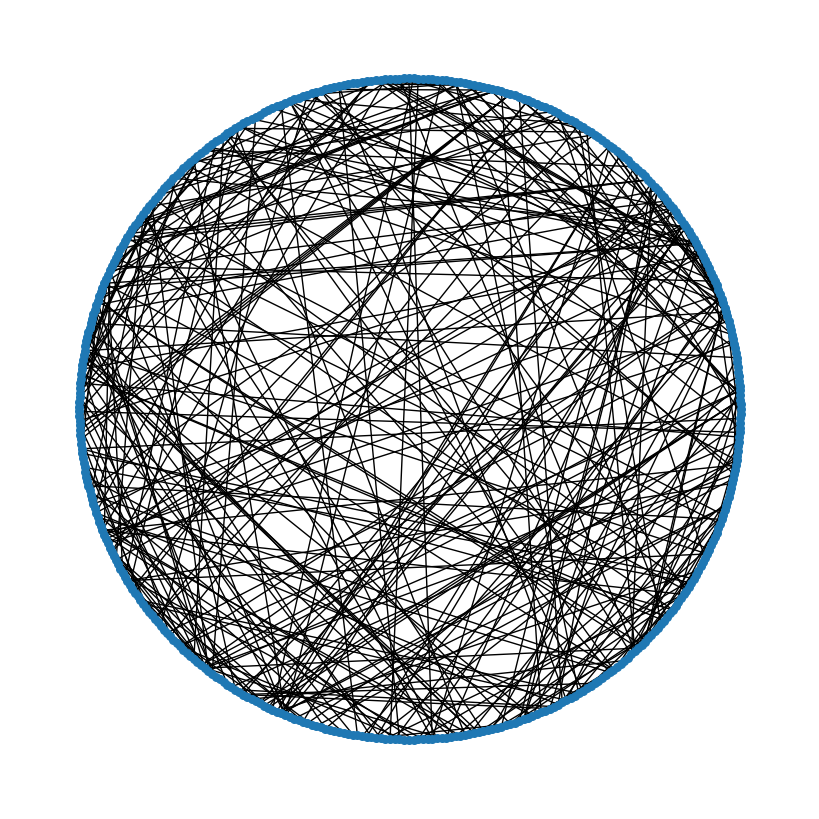

In [78]:
# using the fcircular layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G, node_size=30)